In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix, f1_score,recall_score,precision_score,make_scorer,roc_curve, auc , classification_report
from imblearn.over_sampling import SMOTE
from sklearn import tree
from tkinter import *
import customtkinter
import joblib
from PIL import Image,ImageTk
from tkinter import ttk
import tkinter as tk

In [5]:
df=pd.read_csv(r'healthcare-dataset-stroke-data.csv')

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [32]:
df.shape

(5110, 12)

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


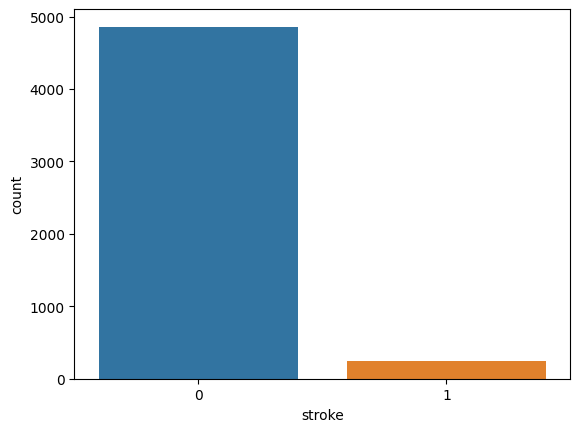

In [7]:
sns.countplot(data=df, x='stroke')
plt.show()

We Got A Skewed Class Problem
To Solve We are going to use SMOTE but first we are going to remove the NaN Values from our dataset and do some preproccesing 

In [8]:
df1=df.drop(['id','work_type','Residence_type','smoking_status'],axis=1)

In [9]:
# Define mappings
gender_mapping = {'Male': 1, 'Female': 0}
married_mapping = {'Yes': 1, 'No': 0}
smoking_mapping = {'formerly smoked': 1, 'never smoked': 0, 'smokes': 1}
# Apply mappings
df1['gender'] = df1['gender'].map(gender_mapping)
df1['ever_married'] = df1['ever_married'].map(married_mapping)
# Drop 'smoking_status' column

In [10]:
df1.shape

(5110, 8)

In [11]:
df3=df1.dropna()

In [12]:
df3.shape

(4908, 8)

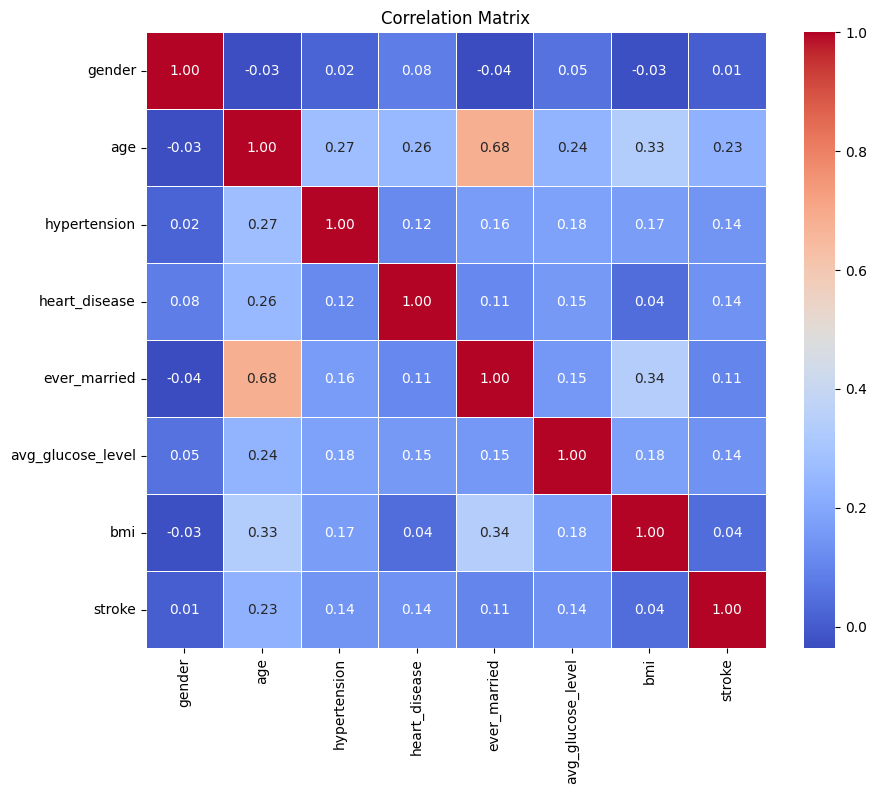

In [13]:
corr_matrix=df3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
X = df3.drop('stroke', axis=1)
y = df3['stroke']
smote = SMOTE(sampling_strategy=1.0 ,random_state=21)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [15]:
print("Original class distribution:")
print(y.value_counts())

print("\nResampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Original class distribution:
stroke
0    4699
1     209
Name: count, dtype: int64

Resampled class distribution:
stroke
1    4699
0    4699
Name: count, dtype: int64


In [16]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [17]:
df_resampled.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,1.0,67.0,0,1,1,228.69,36.6,1
1,1.0,80.0,0,1,1,105.92,32.5,1
2,0.0,49.0,0,0,1,171.23,34.4,1
3,0.0,79.0,1,0,1,174.12,24.0,1
4,1.0,81.0,0,0,1,186.21,29.0,1


In [18]:
df_resampled.describe()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
count,9398.000000,9398.000000,9398.000000,9398.000000,9398.000000,9398.000000,9398.000000,9398.000000
mean,0.427079,54.946510,0.088529,0.046712,0.719515,118.890123,29.535143,0.500000
std,0.456955,22.159409,0.284078,0.211033,0.449260,55.149223,6.844218,0.500027
min,0.000000,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,0.000000,41.000000,0.000000,0.000000,0.000000,78.441303,25.100000,0.000000
50%,0.158931,59.000000,0.000000,0.000000,1.000000,97.060000,28.815495,0.500000
75%,1.000000,74.000000,0.000000,0.000000,1.000000,144.550301,33.062751,1.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


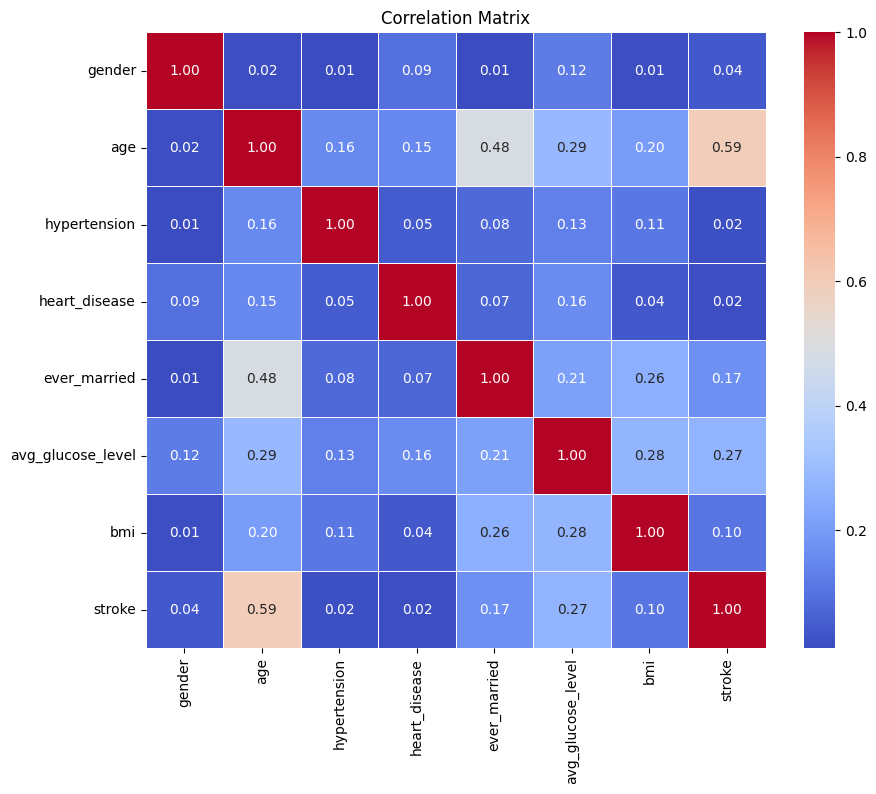

In [19]:
c_matrix=df_resampled.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [20]:
# X = df_resampled.drop('stroke', axis=1)
# y = df_resampled['stroke']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# clf = DecisionTreeClassifier(random_state=42)
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [1,3, 5, 7,9],
#     'min_samples_split': [2,3,4,5,10],
#     'min_samples_leaf': [1,3,2,5,4],
# }
# scoring = {
#     'f1_score': make_scorer(f1_score),
#     'recall': make_scorer(recall_score),
#     'accuracy': make_scorer(accuracy_score),
#     'precision': make_scorer(precision_score)
# }
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring=scoring, refit='f1_score', verbose=1, n_jobs=-1)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# print(f"Best parameters: {best_params}")
# best_clf = grid_search.best_estimator_
# y_pred = best_clf.predict(X_test)
# print(f"F1 Score: {f1_score(y_test, y_pred)}")
# print(f"Recall: {recall_score(y_test, y_pred)}")
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# print(f"Precision: {precision_score(y_test, y_pred)}")

In [21]:
X = df_resampled.drop('stroke', axis=1)
y = df_resampled['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(max_depth=9,min_samples_leaf=1,min_samples_split=3,criterion='gini',random_state=42)


In [33]:
X_train.shape

(7518, 7)

In [34]:
X_test.shape

(1880, 7)

In [22]:
dt.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=9, min_samples_split=3, random_state=42)

In [23]:
y_pred=dt.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.84      0.89       922
           1       0.86      0.95      0.90       958

    accuracy                           0.90      1880
   macro avg       0.90      0.90      0.90      1880
weighted avg       0.90      0.90      0.90      1880



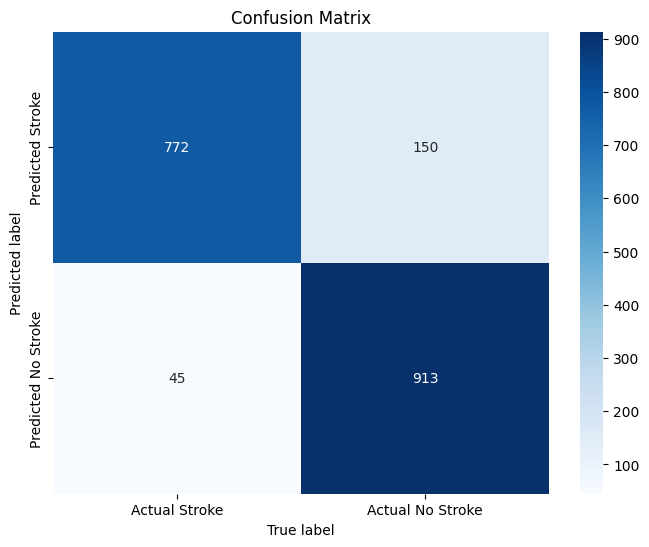

In [25]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            yticklabels=['Predicted Stroke', 'Predicted No Stroke'], 
            xticklabels=['Actual Stroke', 'Actual No Stroke'])
plt.title('Confusion Matrix')
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

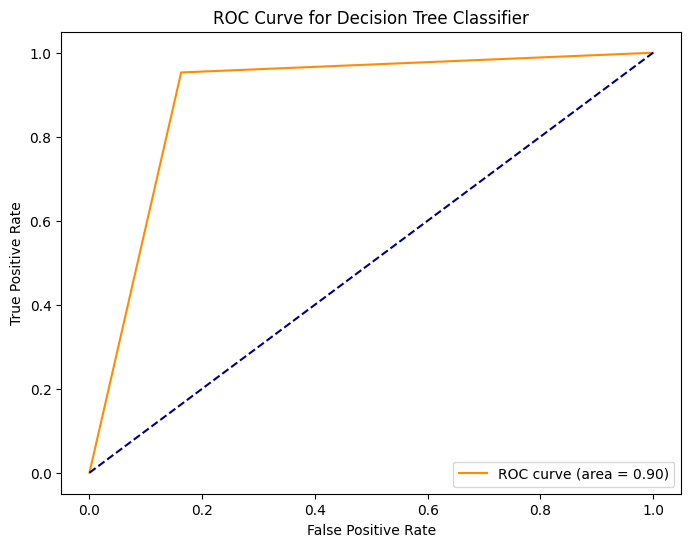

In [26]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

In [31]:
def on_select(event):
    print(f"Selected: {combo_box.get()}")
customtkinter.set_appearance_mode("dark")
customtkinter.set_default_color_theme("dark-blue")
root = customtkinter.CTk()
root.title("Stroke Prediction")
root.geometry("1080x720")
def predict():
    inputs = {
        "gender": combo_boxes[0].get(),
        "age": float(entry_widgets["age"].get()),
        "hypertension": combo_boxes[1].get(),
        "heart_disease": combo_boxes[2].get(),
        "ever_married": combo_boxes[3].get(),
        "avg_glucose_level": float(entry_widgets["avg_glucose_level"].get()),
        "bmi": float(entry_widgets["bmi"].get()),
    }
    gender_map = {"True": 1, "False": 0}
    hypertension_map = {"True": 1, "False": 0}
    heart_disease_map = {"True": 1, "False": 0}
    ever_married_map = {"True": 1, "False": 0}
    
    if inputs["gender"] in gender_map:
        inputs["gender"] = gender_map[inputs["gender"]]
    else:
        print(f"Unknown gender value: {inputs['gender']}")

    if inputs["hypertension"] in hypertension_map:
        inputs["hypertension"] = hypertension_map[inputs["hypertension"]]
    else:
        print(f"Unknown hypertension value: {inputs['hypertension']}")

    if inputs["heart_disease"] in heart_disease_map:
        inputs["heart_disease"] = heart_disease_map[inputs["heart_disease"]]
    else:
        print(f"Unknown heart disease value: {inputs['heart_disease']}")

    if inputs["ever_married"] in ever_married_map:
        inputs["ever_married"] = ever_married_map[inputs["ever_married"]]
    else:
        print(f"Unknown ever married value: {inputs['ever_married']}")

    # Prepare input data for prediction with feature names
    feature_names = [
        "gender", "age", "hypertension", "heart_disease", "ever_married",
        "avg_glucose_level", "bmi"
    ]
    input_data = np.array([
        inputs["gender"],
        inputs["age"],
        inputs["hypertension"],
        inputs["heart_disease"],
        inputs["ever_married"],
        inputs["avg_glucose_level"],
        inputs["bmi"]
    ]).reshape(1, -1)
    input_df = pd.DataFrame(input_data, columns=feature_names)
    # Make prediction using the trained classifier
    prediction = dt.predict(input_df)
    # Display prediction result
    result_label.config(text=f"Predicted Stroke: {prediction[0]}")
title_font = ("Arial", 12, "bold")
num_label_font = ("Arial", 14, "bold")
options = ["True", "False"]
titles = ["ever_married", "gender", "hypertension", "heart_disease"]
combo_boxes = []

for title in titles:
    frame = tk.Frame(root, bg=root["bg"])
    frame.pack(padx=20, pady=10)
    
    label = tk.Label(frame, text=title.replace("_", " ").title(), bg=root["bg"], fg="white", font=title_font)
    label.pack(padx=10, pady=(0, 5))
    
    combo_frame = tk.Frame(frame, bg=root["bg"])
    combo_frame.pack()
    
    combo_box = ttk.Combobox(combo_frame, values=options, style="TCombobox", background=root["bg"], state="readonly")
    combo_box.set(options[0])
    combo_box.bind("<<ComboboxSelected>>", on_select)
    combo_box.pack(padx=10, pady=(5, 10))
    
    combo_boxes.append(combo_box)
entry_titles = ["age", "avg_glucose_level", "bmi"]
entry_widgets = {}
for title in entry_titles:
    frame = tk.Frame(root, bg=root["bg"])
    frame.pack(padx=20, pady=10)

    label = tk.Label(frame, text=title.replace("_", " ").title(), bg=root["bg"], fg="white", font=num_label_font)
    label.pack(padx=10, pady=(0, 5))

    entry = tk.Entry(frame, bg="white", fg="black", insertbackground="white", relief="flat")
    entry.pack(padx=10, pady=(5, 10))
    
    entry_widgets[title] = entry
button = customtkinter.CTkButton(master=root, text="Predict", command=predict)
button.place(relx=0.5, rely=0.82, anchor=tk.CENTER)
result_label = tk.Label(root, text="", bg=root["bg"], fg="white", font=num_label_font)
result_label.pack(pady=20)
root.mainloop()

Selected: True
